> # <font color='red'> PCA: Diamensionality Reduction<font>
**Objective:**
    To demonstrate use of PCA (principle component analysis) using load_digits dataset to train complex(large) dataset by selecting most responsible features in our dataset.

***

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
# Load load_digits dataset this dataset contains blurr images of digits from 0 to 9
# In form of numpy array.
# Our objective is to predict these digits correctly with our model
dataset=load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
# this dataset has 1797 images of 16x16 pixels 
# and not all of these are adding value to our model
# we are going to select most useful pixels to predict correct digit using PCA
dataset.data.shape

(1797, 64)

In [4]:
# First image in form of numpy array
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
# Reshaping flatten array into numpy image array
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

**Visual representation of Data**

<Figure size 640x480 with 0 Axes>

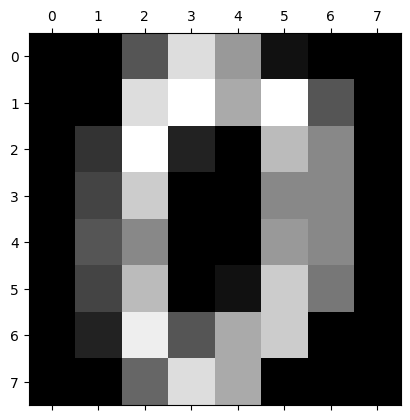

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

In [7]:
# Rechecking targets of image in our dataset
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
# Checking target of above image
dataset.target[0]

0

<Figure size 640x480 with 0 Axes>

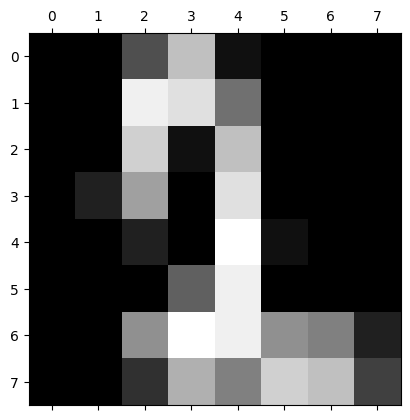

In [9]:
# plot 13th image
plt.gray()
plt.matshow(dataset.data[12].reshape(8,8))

In [10]:
# Check target value of above image
dataset.target[12]

2

In [11]:
df_data=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df_data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [12]:
df_data.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [13]:
x=df_data
y=dataset.target

**Model Building on complete dataset**

In [14]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [15]:
# Split the data into train and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=45)

In [16]:
# Initiate logistic regression model on complete dataset
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9722222222222222

### Accuracy Score: 97.2%
### No of Components: 64

**Model building with diamensionality reduction using PCA**

In [17]:
from sklearn.decomposition import PCA

pca=PCA(0.95)            # reduce dimension to explain 95% of variance in data
x_pca=pca.fit_transform(x)
x_pca.shape

(1797, 29)

In [18]:
# Check first transformed data
x_pca[0]

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [19]:
# Check weight of each column in explaination of target variance
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [20]:
# Total no of features (components)
pca.n_components_ # Component reducted from 64 to 29, and still explaining 95% of variance

29

In [21]:
# Split the data into train and test set
pca_x_train,pca_x_test,pca_y_train,pca_y_test=train_test_split(x_pca,y,test_size=0.2,random_state=45)

In [22]:
# Initiate logistic regression model 
model1=LogisticRegression(max_iter=1000)
model1.fit(pca_x_train,pca_y_train)
model1.score(pca_x_test,pca_y_test)

0.9666666666666667

### Accuracy Score: 96.7 %
### No of Components: 29

In [23]:
# To check power of PCA, I am drastically reducting components to 2\
#  (which is crazy, only 2 pixels out of 64)
pca=PCA(n_components=2) # Reduced dimension to 2 manually
X_pca=pca.fit_transform(x)
X_pca.shape

(1797, 2)

In [24]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [25]:
pca_x_train,pca_x_test,pca_y_train,pca_y_test=train_test_split(X_pca,y,test_size=0.2,random_state=45)

In [26]:
model1=LogisticRegression(max_iter=1000)
model1.fit(pca_x_train,pca_y_train)
model1.score(pca_x_test,pca_y_test)

0.6361111111111111

### Accuracy Score: 63.6%
### No of Components: 2